In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
sns.set(style="ticks")

In [191]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [192]:
!ls -Alh /content/drive/MyDrive/asdf/photovoltaics

total 1.2G
-rw------- 1 root root 494K Mar  8 02:26 datetime_test.npy
-rw------- 1 root root 4.6M Mar  8 02:26 datetime_trainval.npy
-rw------- 1 root root 117M Mar  8 02:27 images_test.npy
-rw------- 1 root root 1.1G Mar  8 02:29 images_trainval.npy
-rw------- 1 root root  78K Mar  8 02:29 pv_log_test.npy
-rw------- 1 root root 727K Mar  8 02:29 pv_log_trainval.npy


test_classifier

In [193]:
datetime_test= pd.DataFrame(np.load('/content/drive/MyDrive/asdf/photovoltaics/datetime_test.npy', allow_pickle=True)[()], columns=['d_t'])


In [194]:
datetime_test

,d_t
0,2017-05-20 08:00:00
1,2017-05-20 08:01:00
2,2017-05-20 08:02:00
3,2017-05-20 08:03:00
4,2017-05-20 08:04:00
...,...
9905,2018-02-28 17:20:00
9906,2018-02-28 17:21:00
9907,2018-02-28 17:22:00
9908,2018-02-28 17:23:00


In [195]:
pv_log_test  = pd.DataFrame(np.load('/content/drive/MyDrive/asdf/photovoltaics/pv_log_test.npy', allow_pickle=True)[()],columns=['pv_l'])


In [196]:
pv_log_test

,pv_l
0,4.135803
1,4.270825
2,4.415733
3,4.541637
4,4.640267
...,...
9905,0.203968
9906,0.151163
9907,0.101572
9908,0.060568


In [197]:
images_test  = np.load('/content/drive/MyDrive/asdf/photovoltaics/images_test.npy', allow_pickle=True)[()]


In [198]:
images_test[0].shape

(64, 64, 3)

In [199]:
len(r_1)

2364

In [200]:
list_zenith_test = []
list_azimuth_test = []

In [201]:
a = datetime_test['d_t'].dt.dayofyear
day_list = list(a)


In [202]:
day_list[9000]

32

In [203]:
len(day_list)

9910

In [204]:
latitude = 37.427764019872384

In [205]:
math.sin(math.radians(latitude))

0.6077607207198729

In [206]:
list_azimuth_test =[]
list_zenith_test = []

In [207]:
hour_series = datetime_test['d_t'].dt.hour
hour_list= list(hour_series)

In [27]:
# alpha = (360/24)*((hour_list[i]-12))

8

In [208]:
for i in range(len(day_list)):
  lambd = 23.44*math.sin(math.radians(360*((day_list[i] - 80)/365.25)))
  hour_angle = (360/24)*(hour_list[i]-12)
  # alpha = (360/24)*((hour_list[i]-12))
  zenith_angle = math.acos(math.sin(math.radians(latitude))*math.sin(math.radians(lambd)) + math.cos(math.radians(latitude))*math.cos(math.radians(lambd))*math.cos(math.radians(hour_angle)))*180/np.pi
  azimth_angle = math.atan(math.sin(math.radians(hour_angle))/(math.sin(math.radians(latitude))*math.cos(math.radians(hour_angle)) - math.cos(math.radians(latitude))*math.tan(math.radians(lambd))))*180/np.pi
  list_azimuth_test.append(azimth_angle)
  list_zenith_test.append(zenith_angle)

In [209]:
power_theta_list_test= []

In [210]:
for i in range(len(day_list)):
  power_theta = 1*24.98*(math.cos(math.radians(22.5))*math.cos(math.radians(list_zenith_test[i])) + math.sin(math.radians(22.5))*math.sin(math.radians(list_zenith_test[i]))* math.cos(math.radians(list_azimuth_test[i] - 195)))
  power_theta_list_test.append(power_theta)

In [211]:
pv_log_test_list = list(pv_log_test["pv_l"])

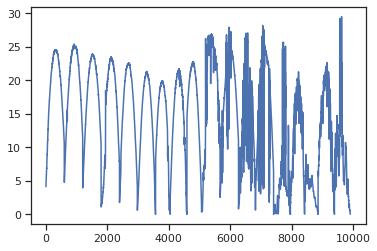

In [215]:
plt.plot(pv_log_test_list)

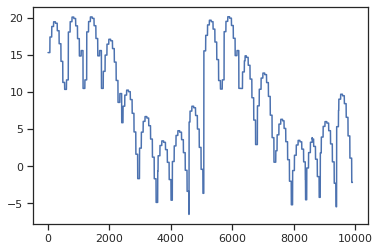

In [216]:
plt.plot(power_theta_list_test)

In [217]:
power_theta_list_test

[15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215592912,
 15.329032215

In [241]:
r = [i/j for i,j in zip ( power_theta_list_test,pv_log_test_list)]

In [245]:
for i in range(len(r)):
  if r[i]<0.9:
    r[i]= "cloudy"
  else:
    r[i]= "sunny"

In [248]:
df_label = pd.DataFrame(r, columns = ['label'])

In [249]:
df_label.to_csv('teat_label.csv')